# This program will predict zeta_disease 

In [ ]:
##importing the data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
train = pd.read_csv('training-data.csv')
test = pd.read_csv('test_data.csv')

In [33]:
train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [34]:
test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [35]:
#remove the response column
test.drop(['zeta_disease'], axis=1,inplace=True)

In [36]:
##missing data in train and test
train.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [37]:
##missing data in test set
test.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
dtype: int64

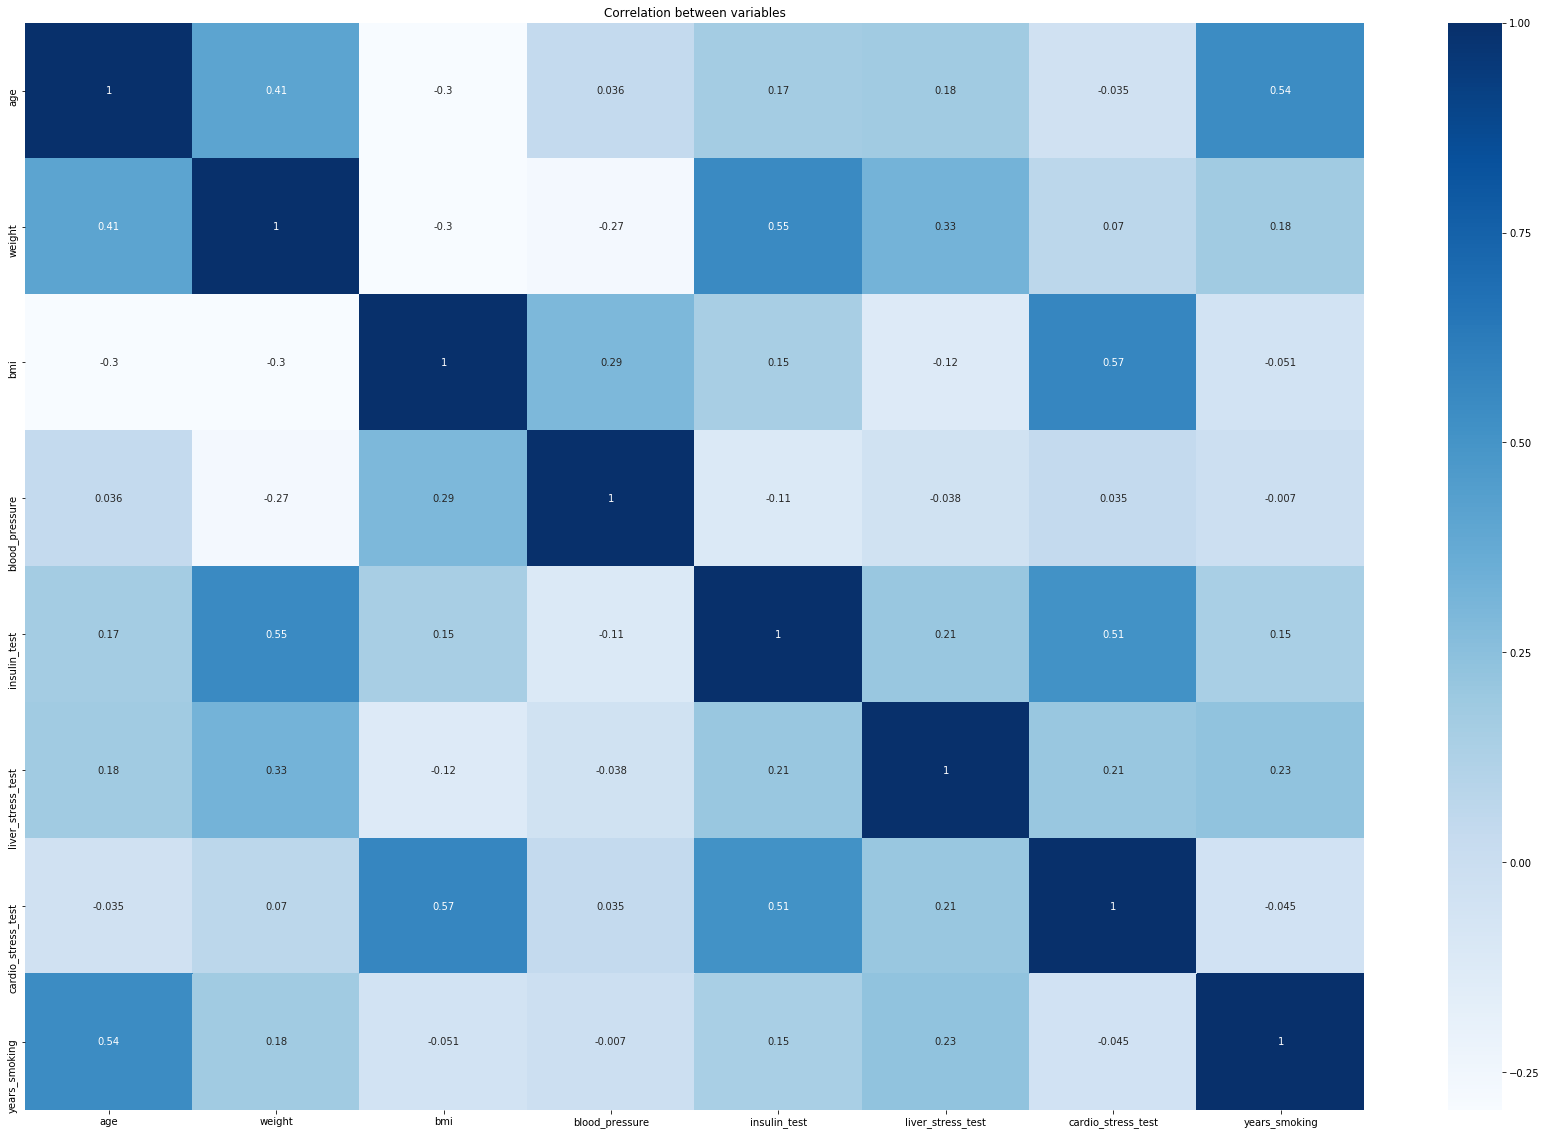

In [38]:
#To check multicolinearity between independent variables
plt.figure(figsize=(30, 20))
plt.title('Correlation between variables')
sns.heatmap(test.corr(), annot=True, cmap='Blues');

In [39]:
#years of smoking and age , is higher colinearity
#weight and insulin_test has higher colinearity

In [40]:
# feature meatrix and response vector seperation
X_train=train.iloc[:,0:-1]
y_train=train['zeta_disease']

In [41]:
X_train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,54,189,27.1,80,0,1.5038,0,10
1,23,150,38.5,68,71,0.3868,55,2
2,47,186,29.9,90,0,0.2728,0,7
3,18,150,30.8,70,1033,0.6598,56,0
4,24,160,32.4,74,125,0.7608,59,2


In [42]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
#Using Logistic regression
logit_model = LogisticRegression(penalty='l2')
clf_logit = logit_model.fit(X_train,y_train)
y_pred=clf_logit.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.78


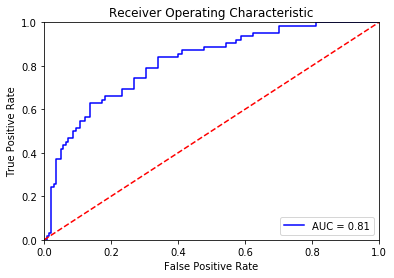

In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_logit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

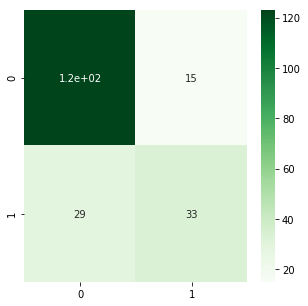

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       138
           1       0.69      0.53      0.60        62

    accuracy                           0.78       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200



In [47]:
#Confusion Matrix Logistic Regression
plt.rcParams['figure.figsize'] = (5, 5)
cm_logit = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_logit, annot = True, cmap = 'Greens')
plt.show()
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [48]:
# Using a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
y_pred=clf_DT.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.76


In [49]:
#Using a Random Forest tree classifier
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':range(1,20,2)}
RF=RandomForestClassifier()
clf_rf=GridSearchCV(RF,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
y_pred=clf_rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.765

In [50]:
#Lets use k-fold cross validation
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)
score= cross_val_score(DT,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)
print(f'average score Decission Tree : {round(np.mean(score),2)}')

[0.8        0.61666667 0.7        0.66666667 0.61666667 0.66666667
 0.75       0.68333333 0.66666667 0.68333333]
average score Decission Tree : 0.68


In [51]:
score= cross_val_score(RF,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)
print(f'average score Random Forest : {round(np.mean(score),2)}')

[0.76666667 0.7        0.68333333 0.81666667 0.7        0.76666667
 0.73333333 0.78333333 0.65       0.75      ]
average score Random Forest : 0.74


In [52]:
clf=SVC()
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=-1,scoring='accuracy')
print(score)
print(f'average score Support Vector : {round(np.mean(score),2)}')

[0.65       0.6        0.66666667 0.71666667 0.56666667 0.7
 0.65       0.65       0.58333333 0.63333333]
average score Support Vector : 0.64


**Applying Sampling Technique**

In [53]:
#just to see the ratio of the category under the response variable
train['zeta_disease'].value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

# Sampling Techniques are used to balance the target variable which are not in same samples
# There are several sampling techniques
# 1)Under Sampling
# 2)Up sampling
# 3)SMOT  ==== Let's apply this and see the accuracy
# 4)Class Weight

In [54]:
#Up sampling with SMOTE
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(X_train, y_train.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(766, 8)
(766,)


In [55]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(612, 8)
(612,)
(154, 8)
(154,)


Training Accuracy:  0.9869281045751634
Testing Accuarcy:  0.8051948051948052


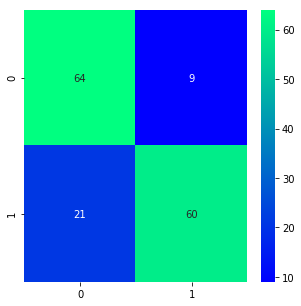

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        73
           1       0.87      0.74      0.80        81

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.81      0.81      0.80       154



In [57]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()
# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [58]:
#Final Model #Final Model  clf_DT gives better result
predictions = model_o.predict(test).tolist()

In [59]:
test['zeta_disease'] = predictions

In [60]:
test.to_csv('zeta-disease_prediction-data.csv', index = False)
test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,1
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,0
